In [10]:
%pip install -q yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from datetime import datetime

Note: you may need to restart the kernel to use updated packages.


In [11]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'TSLA', 'ITA']
company_names = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON", "TESLA", "ISHARES"]

In [12]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

company_data = {}
for stock in tech_list:
    company_data[stock] = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [13]:
company_list = []
for stock, name in zip(tech_list, company_names):
    df_temp = company_data[stock].copy()
    df_temp['company_name'] = name
    df_temp['ticker'] = stock
    company_list.append(df_temp)

df = pd.concat(company_list, axis=0)

(array([19905., 19967., 20028., 20089., 20148., 20209.]),
 [Text(19905.0, 0, '2024-07'),
  Text(19967.0, 0, '2024-09'),
  Text(20028.0, 0, '2024-11'),
  Text(20089.0, 0, '2025-01'),
  Text(20148.0, 0, '2025-03'),
  Text(20209.0, 0, '2025-05')])

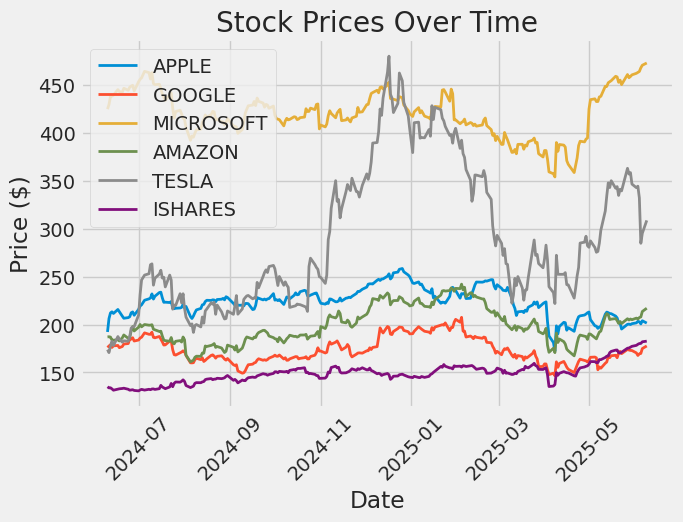

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
for stock, name in zip(tech_list, company_names):
    plt.plot(company_data[stock].index, company_data[stock]['Close'],label=name,linewidth=2)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.xticks(rotation=45)

In [16]:
AAPL.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,223.177331,225.489024,220.450175,222.810511,5.626428e+07
std,15.043731,14.467602,15.532018,15.224996,3.243710e+07
min,172.194199,190.090729,168.988411,171.724805,2.323470e+07
25%,213.130150,215.233415,210.588762,212.874461,3.964202e+07
50%,224.210571,226.070020,222.231379,224.170648,4.761735e+07
75%,232.515671,234.263584,229.182156,232.447929,6.041002e+07
max,258.396667,259.474086,257.010028,257.568678,3.186799e+08


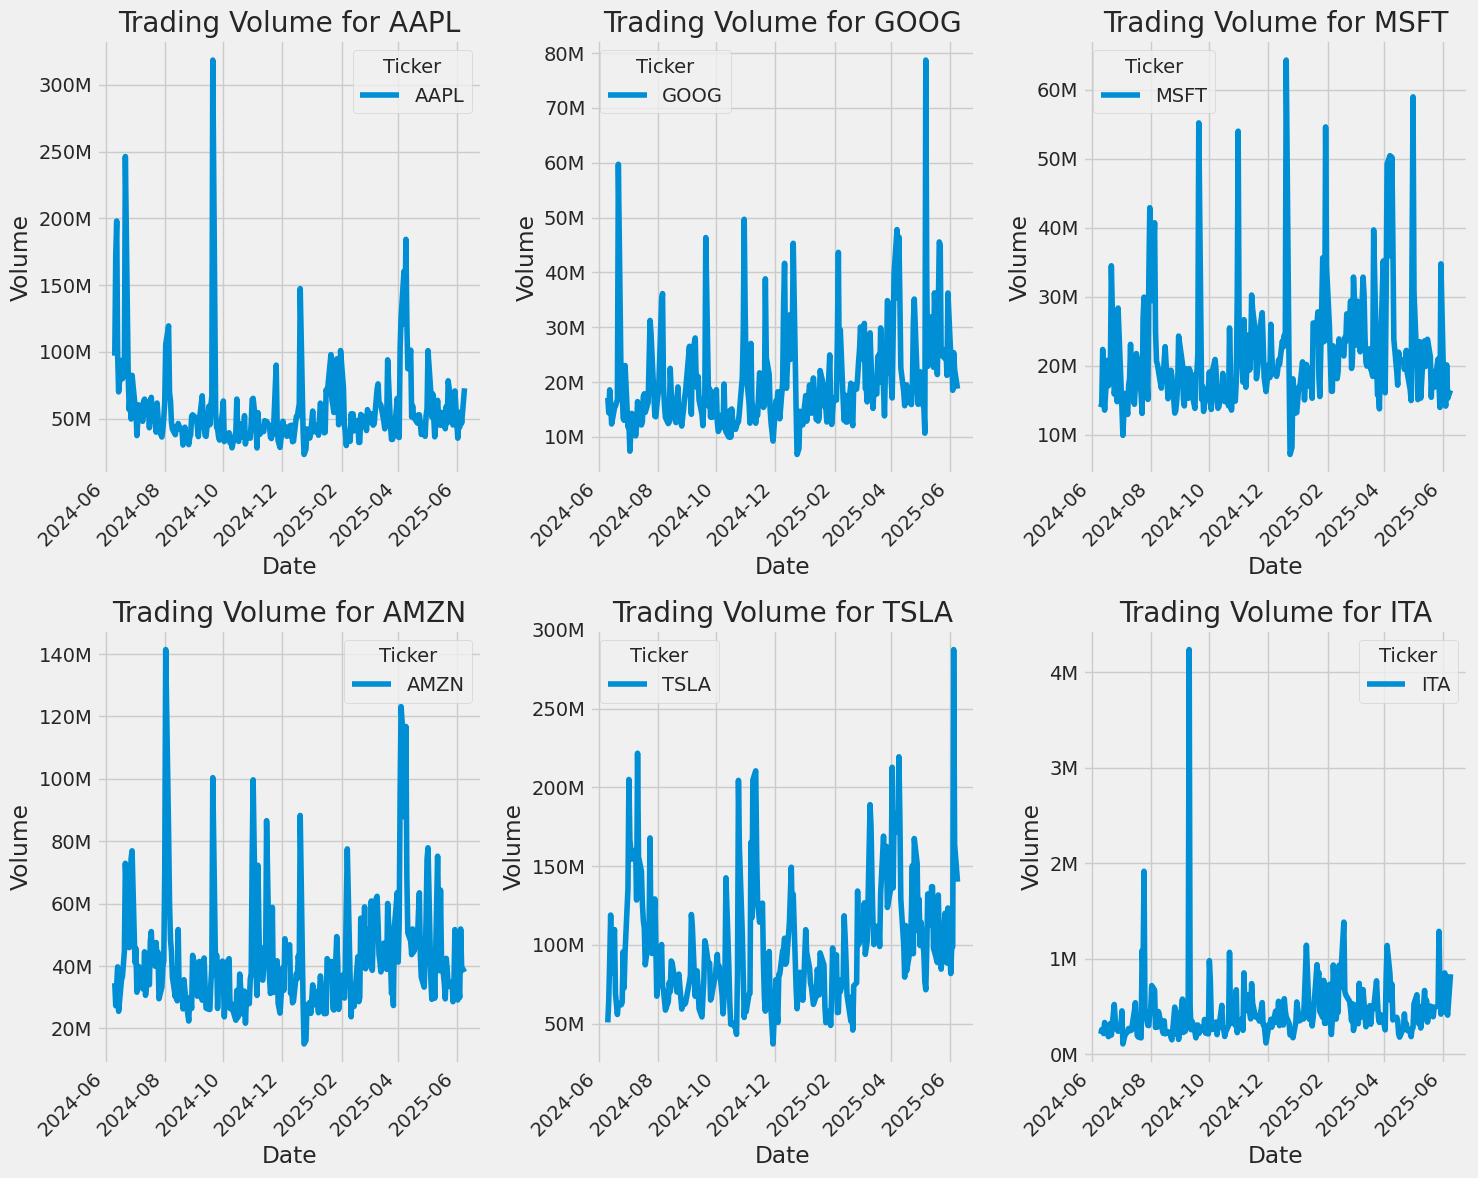

In [21]:
plt.figure(figsize=(15, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 3, i)
    
    # Plot with better date handling
    ax = plt.gca()
    company['Volume'].plot(ax=ax)
    
    # Fix the x-axis formatting
    ax.tick_params(axis='x', rotation=45)
    
    import matplotlib.dates as mdates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Every 2 months
    
    plt.ylabel('Volume')
    plt.xlabel('Date')
    plt.title(f"Trading Volume for {tech_list[i - 1]}")
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.0f}M'))

plt.tight_layout()
plt.show()

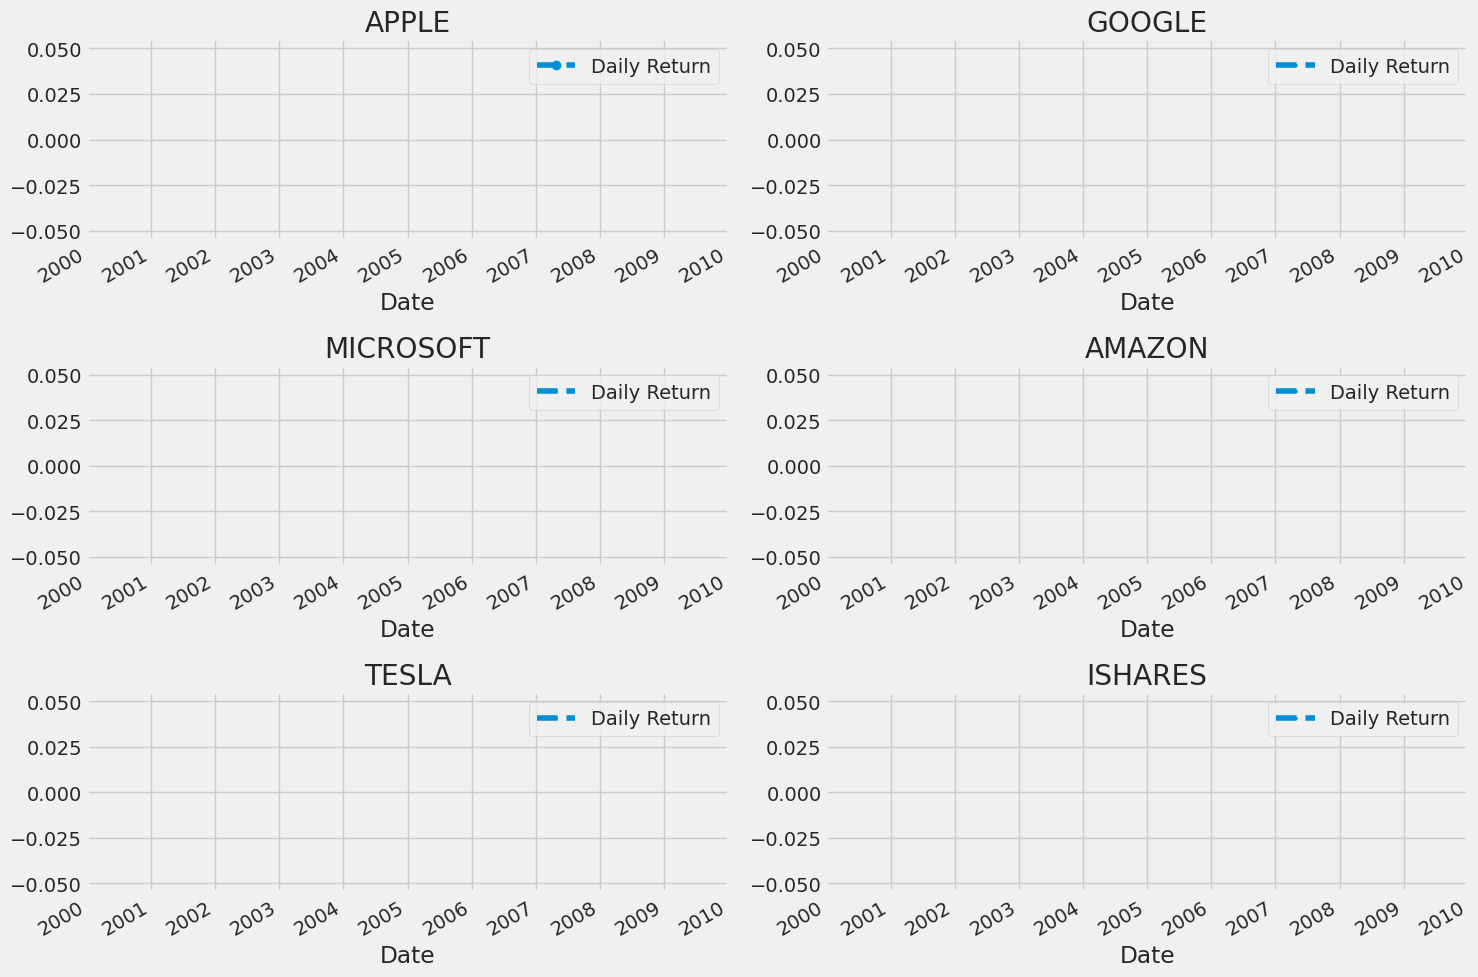

In [ ]:
# Calculate Daily Returns for each company in company_list
for company in company_list:
    company['Daily Return'] = company['Close'].pct_change()

# Create the plots using company_list (not undefined AAPL, GOOG variables)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Plot each company from company_list
company_list[0]['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

company_list[1]['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

company_list[2]['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

company_list[3]['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

company_list[4]['Daily Return'].plot(ax=axes[2,0], legend=True, linestyle='--', marker='o')
axes[2,0].set_title('TESLA')

company_list[5]['Daily Return'].plot(ax=axes[2,1], legend=True, linestyle='--', marker='o')
axes[2,1].set_title('ISHARES')

fig.tight_layout()
plt.show()